# Real-Time Face Recognition System using Deep Learning


# Model 1: MiniFaceRecognitionNetwork

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns

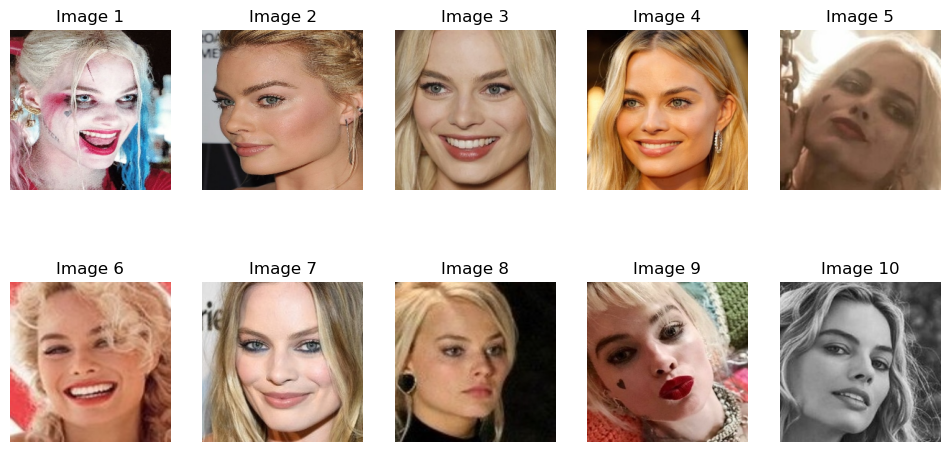

In [4]:
# Set your image folder path
image_folder = 'robbie'


def display_random_images(image_folder, num_images=10, rows=2, cols=5, target_size=(224, 224)):
    image_files = [file for file in os.listdir(image_folder) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    selected_files = random.sample(image_files, num_images)

    plt.figure(figsize=(12, 6))
    for i, file in enumerate(selected_files, 1):
        image_path = os.path.join(image_folder, file)
        img = cv2.imread(image_path)

        if img is not None:
            img = cv2.resize(img, target_size)

            plt.subplot(rows, cols, i)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Image {i}')
            plt.axis('off')

    plt.show()

display_random_images(image_folder, num_images=10, rows=2, cols=5, target_size=(224, 224))


In [5]:

# Define the MiniFaceRecognitionNetwork class
class MiniFaceRecognitionNetwork(nn.Module):
    def __init__(self, num_classes):
        super(MiniFaceRecognitionNetwork, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 56 * 56, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        # Flatten before fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

In [6]:



class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = 1 if 'positive' in img_name.lower() else 0

        return image, label


transform_augmentation = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

augmented_dataset = CustomDataset(root_dir=image_folder, transform=transform_augmentation)

num_classes = 2  
mini_net = MiniFaceRecognitionNetwork(num_classes)

batch_size = 32  
cleaned_data_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)


In [8]:
# Optimizer, learning rate, and batch size
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mini_net.parameters(), lr=0.001)  
num_epochs = 20

train_losses = []
train_accuracies = []

# Training loop
for epoch in range(num_epochs):
    mini_net.train()  
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in cleaned_data_loader:
        optimizer.zero_grad()

        outputs = mini_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(cleaned_data_loader)
    accuracy = correct / total
    train_losses.append(average_loss)
    train_accuracies.append(accuracy)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [2/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [3/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [4/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [5/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [6/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [7/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [8/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [9/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [10/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [11/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [12/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [13/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [14/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [15/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [16/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [17/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [18/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [19/20], Loss: 0.0000, Accuracy: 1.0000
Epoch [20/20], Loss: 0.0000, Accuracy: 1.0000


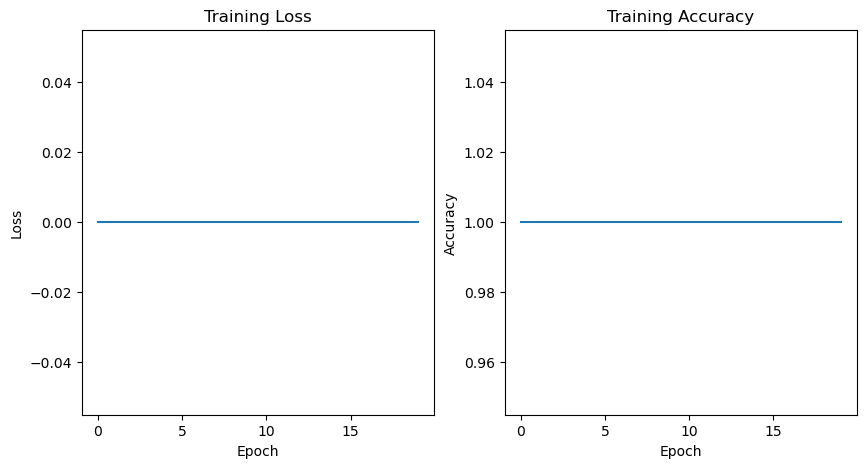

In [9]:
# Plotting training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()


In [10]:
# Save the trained model
torch.save(mini_net.state_dict(), 'mini_face_recognition_model.pth')

# Evaluate the model
mini_net.eval()
predictions = []
targets = []

for inputs, labels in cleaned_data_loader:
    outputs = mini_net(inputs)
    _, predicted = torch.max(outputs, 1)
    predictions.extend(predicted.tolist())
    targets.extend(labels.tolist())

print("Classification Report:")
print(classification_report(targets, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



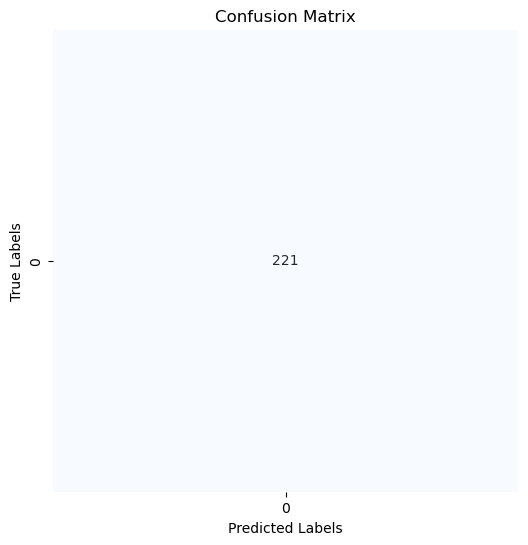

In [11]:

# Confusion matrix
cm = confusion_matrix(targets, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Model 2;resnet18

In [3]:
import warnings
warnings.filterwarnings("ignore")

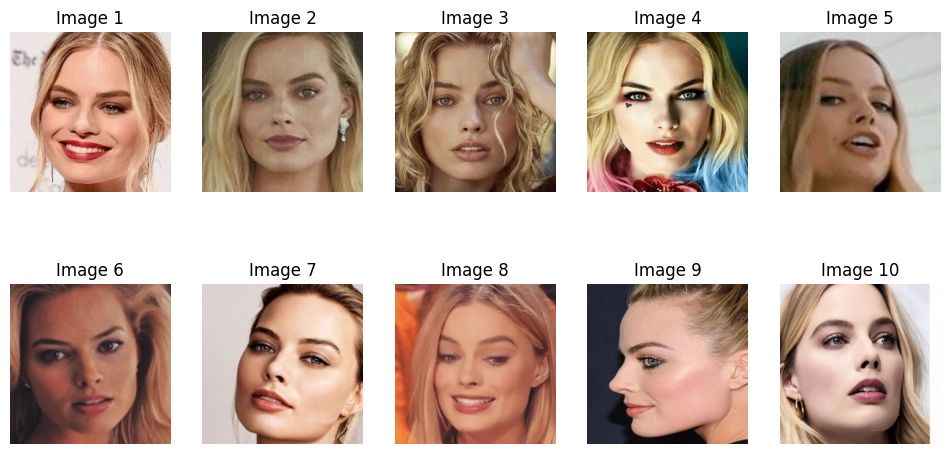

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torchvision import models

# Set your image folder path
image_folder = 'robbie'


def display_random_images(image_folder, num_images=10, rows=2, cols=5, target_size=(224, 224)):
    image_files = [file for file in os.listdir(image_folder) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    selected_files = random.sample(image_files, num_images)

    plt.figure(figsize=(12, 6))
    for i, file in enumerate(selected_files, 1):
        image_path = os.path.join(image_folder, file)
        img = cv2.imread(image_path)

        if img is not None:
            img = cv2.resize(img, target_size)

            plt.subplot(rows, cols, i)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Image {i}')
            plt.axis('off')

    plt.show()

display_random_images(image_folder, num_images=10, rows=2, cols=5, target_size=(224, 224))


In [13]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = 1 if 'positive' in img_name.lower() else 0

        return image, label

# Dataset and DataLoader for training
transform_augmentation = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

augmented_dataset = CustomDataset(root_dir=image_folder, transform=transform_augmentation)

num_classes = 2  

# Load pre-trained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)

# Modify the last fully connected layer for our task
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

In [14]:
# Training loop
batch_size = 32  
cleaned_data_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True)
num_epochs = 10

train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    resnet18.train()  
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in cleaned_data_loader:
        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(cleaned_data_loader)
    accuracy = correct / total
    train_losses.append(average_loss)
    train_accuracies.append(accuracy)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch [1/10], Loss: 0.1695, Accuracy: 0.9864
Epoch [2/10], Loss: 0.0063, Accuracy: 1.0000
Epoch [3/10], Loss: 0.0010, Accuracy: 1.0000
Epoch [4/10], Loss: 0.0004, Accuracy: 1.0000
Epoch [5/10], Loss: 0.0002, Accuracy: 1.0000
Epoch [6/10], Loss: 0.0002, Accuracy: 1.0000
Epoch [7/10], Loss: 0.0001, Accuracy: 1.0000
Epoch [8/10], Loss: 0.0001, Accuracy: 1.0000
Epoch [9/10], Loss: 0.0001, Accuracy: 1.0000
Epoch [10/10], Loss: 0.0002, Accuracy: 1.0000


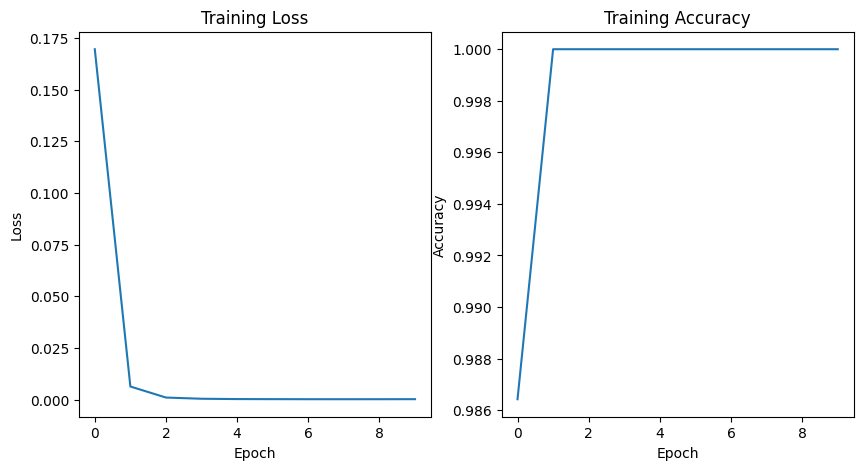

In [15]:
# Plotting training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

# Save the trained model
torch.save(resnet18.state_dict(), 'resnet18_face_recognition_model.pth')



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



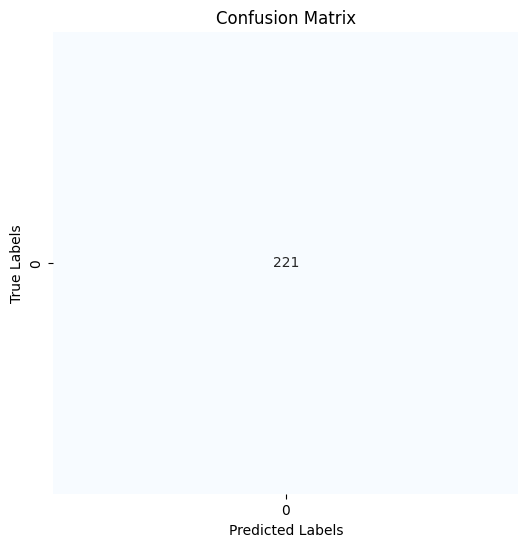

In [16]:
# Evaluate the model
resnet18.eval()
predictions = []
targets = []

for inputs, labels in cleaned_data_loader:
    outputs = resnet18(inputs)
    _, predicted = torch.max(outputs, 1)
    predictions.extend(predicted.tolist())
    targets.extend(labels.tolist())

print("Classification Report:")
print(classification_report(targets, predictions))

# Confusion matrix
cm = confusion_matrix(targets, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# 3.Deployment

In [24]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import gradio as gr

def create_face_mask(image):
    # Convert image to grayscale for face detection
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    mask = Image.new("L", image.size, 0)
    draw = ImageDraw.Draw(mask)
    
    for (x, y, w, h) in faces:
        center = (x + w // 2, y + h // 2)
        axes_length = (w // 2, h // 2)
        draw.ellipse([center[0] - axes_length[0], center[1] - axes_length[1], 
                      center[0] + axes_length[0], center[1] + axes_length[1]], fill=200)  # Fill with white color
    
    return mask, len(faces)

def segment_face(input_image):
    # Open input image
    image = Image.fromarray(input_image.astype('uint8'), 'RGB')
    
    mask, num_faces = create_face_mask(image)
    
    mask_array = np.array(mask)
    
    # Set face regions to light green
    mask_array[mask_array == 255] = 144  # Set white pixels to 144 (light green in grayscale)
    
    # Create an RGB image from the grayscale mask
    mask_rgb = Image.fromarray(mask_array.astype(np.uint8), 'L').convert('RGB')
    
    # Paste the mask onto the original image
    masked_image = Image.new("RGB", image.size)
    masked_image.paste(image, (0, 0))  # Paste original image
    masked_image.paste(mask_rgb, (0, 0), mask=mask)  # Paste light green face regions
    
    segmented_image = np.array(masked_image)
    
    draw = ImageDraw.Draw(masked_image)
    draw.text((10, 10), f"Number of faces: {num_faces}", fill=(255, 255, 255))  # White text
    
    return np.array(masked_image), num_faces

# Launch the Gradio interface for User 001
gr.Interface(segment_face, inputs="image", outputs=["image", "text"], title="Face Detection", 
              description="Detect faces in the input image and color them light green. Display the number of faces detected.").launch()


Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.
